# Health Insurance Cross Sell Prediction

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

## Data Description

* id: Unique ID for the customer
* Gender: Gender of the customer
* Age: Age of the customer
* Driving_License: 0 : Customer does not have driving license, 1 : Customer already has driving license
* Region_Code: Unique code for the region of the customer
* Previously_Insured: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
* Vehicle_Age: Age of the Vehicle
* Vehicle_Damage: 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
* Annual_Premium: The amount customer needs to pay as premium in the year
* PolicySalesChannel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
* Vintage: Number of Days, Customer has been associated with the company
* Response: 1 : Customer is interested, 0 : Customer is not interested

## Data Exploration

In [1]:
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
health_insurance_train = pd.read_csv("health_insurance_train.csv")
health_insurance_test = pd.read_csv("health_insurance_test.csv")
train = health_insurance_train.copy()
test = health_insurance_test.copy()
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [4]:
print("Train Row :", train.shape[0], " | Train Column : ", train.shape[1])
print("*"*40)
print("Test Row :", test.shape[0], " | Test Column : ", test.shape[1])

Train Row : 381109  | Train Column :  12
****************************************
Test Row : 127037  | Test Column :  11


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
for column in ['Region_Code','Annual_Premium','Policy_Sales_Channel']:
    train[column] = train[column].astype('int')
    test[column] = test[column].astype('int')

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [8]:
train.describe(include='O').T

,count,unique,top,freq
Gender,381109,2,Male,206089
Vehicle_Age,381109,3,1-2 Year,200316
Vehicle_Damage,381109,2,Yes,192413


In [9]:
categorical_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']
for category in categorical_columns:
    print(train[category].value_counts(), '\n_________________________\n')

Male      206089
Female    175020
Name: Gender, dtype: int64 
_________________________

1    380297
0       812
Name: Driving_License, dtype: int64 
_________________________

0    206481
1    174628
Name: Previously_Insured, dtype: int64 
_________________________

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64 
_________________________

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64 
_________________________

0    334399
1     46710
Name: Response, dtype: int64 
_________________________



### Observations:
* The customers range in age from 20 to 85 years old, and half of them are 25-49.
* Half of the customers in this dataset have been with the company for 82 to 227 days.
* A slight majority are male.
* The vast majority have a driving license, about 99.8%.
* Most vehicles are less than 2 years old.
* Over half of vehicles have damage of some kind.
* Only 12.3% of customers responded by buying vehicle insurance when asked.

## Data Cleaning

### 1. Removing Duplicates

In [10]:
train[train.duplicated() == True]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


In [11]:
test[test.duplicated() == True]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage


In [12]:
train.drop_duplicates(inplace = True)
test.drop_duplicates(inplace = True)

In [13]:
test_ids = test['id'].tolist()

In [14]:
train = train.drop('id', axis=1)
test = test.drop('id', axis=1)

### 2. Filling Missing Values

In [15]:
def count_missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    dtype = data.dtypes
    missing_data = pd.concat([total, percent, dtype], axis=1, keys=['Total', 'Percent', 'Data Type'])
    return missing_data

In [16]:
count_missing_data(train)

,Total,Percent,Data Type
Response,0,0.0,int64
Vintage,0,0.0,int64
Policy_Sales_Channel,0,0.0,int32
Annual_Premium,0,0.0,int32
Vehicle_Damage,0,0.0,object
Vehicle_Age,0,0.0,object
Previously_Insured,0,0.0,int64
Region_Code,0,0.0,int32
Driving_License,0,0.0,int64
Age,0,0.0,int64


There's no missing data in our dataset.

## Exploratory Data Analysis

In [17]:
def plot_object(col, palette, hue='Response'):
    plt.figure(figsize=(8,7))
    sns.countplot(col, hue=train[hue], palette=palette)
    plt.show()

In [18]:
palette = ['Accent', 'Blues', 'BrBG', 'BuGn', 'CMRmap','BuPu', 
           'Dark2', 'Greens', 'OrRd', 'PRGn', 'GnBu', 'Paired', 
           'Pastel1', 'Pastel2', 'PuBu', 'PiYG', 'PuBuGn']

In [19]:
def get_response_ratio(col):
    df = pd.DataFrame({'total': train[col].value_counts(), 
                 'Response=0':train.loc[train['Response'] == 0, col].value_counts(),
                 'Response=1':train.loc[train['Response'] == 1, col].value_counts()})
    display(df)

In [20]:
def plot_kde(col, palette):
    sns.kdeplot(data=train, x=col, hue='Response', palette=palette)
    plt.show()

### Gender

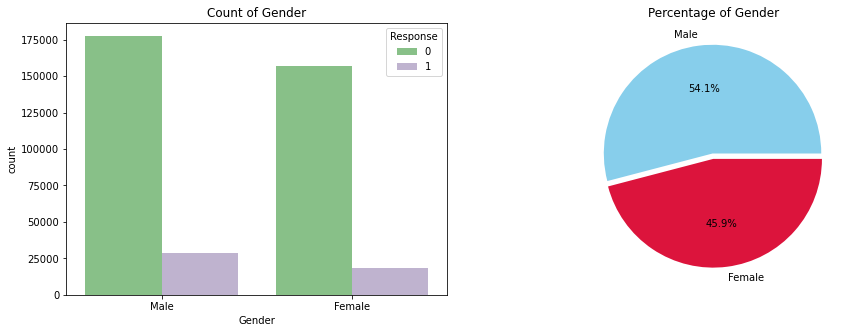

In [21]:
colors = ['#99ff99', '#ff6666']
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Count of Gender')
sns.countplot(train['Gender'], palette=palette[0], hue=train['Response'])

plt.subplot(1,2,2)
plt.pie(train['Gender'].value_counts(), explode=[0.05,0] , colors=['skyblue','crimson'] ,autopct='%.1f%%', 
        labels=['Male', 'Female'], labeldistance=1.1)
plt.title('Percentage of Gender')
plt.show()

In [22]:
get_response_ratio('Gender')

,total,Response=0,Response=1
Male,206089,177564,28525
Female,175020,156835,18185


In [23]:
male = train[train['Gender']=='Male']
female = train[train['Gender']=='Female']

count_response = []
count_response.append(train[train['Response'] == 0]['Response'].count())

count_response.append(male[male['Response']==1]['Response'].count())
count_response.append(female[female['Response']==1]['Response'].count())

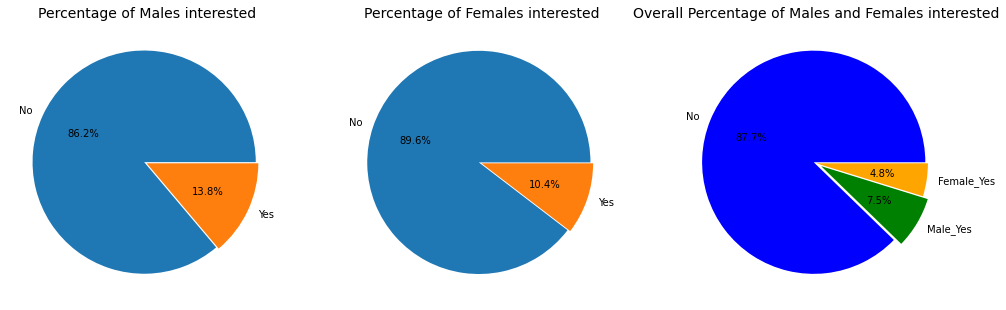

In [24]:
plt.figure(figsize=(17,12))

plt.subplot(1,3,1)
plt.pie(male['Response'].value_counts(), explode=[0.025,0] ,autopct='%.1f%%', labels=['No', 'Yes'], labeldistance=1.1)
plt.title('Percentage of Males interested', size=14)

plt.subplot(1,3,2)
plt.pie(female['Response'].value_counts(), explode=[0.025,0] ,autopct='%.1f%%', labels=['No', 'Yes'], labeldistance=1.1)
plt.title('Percentage of Females interested', size=14)

plt.subplot(1,3,3)
plt.pie(count_response, explode=[0.025,0.05, 0] ,colors=[ 'blue', 'green', 'orange'], autopct='%.1f%%', labels=['No', 'Male_Yes', 'Female_Yes'], labeldistance=1.1)
plt.title('Overall Percentage of Males and Females interested', size=14)

plt.show()

### Driving License

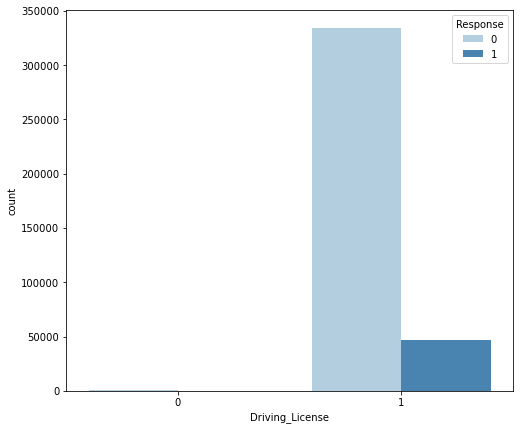

In [25]:
plot_object(train['Driving_License'], palette[1])

In [26]:
get_response_ratio('Driving_License')

,total,Response=0,Response=1
1,380297,333628,46669
0,812,771,41


### Vehical Age

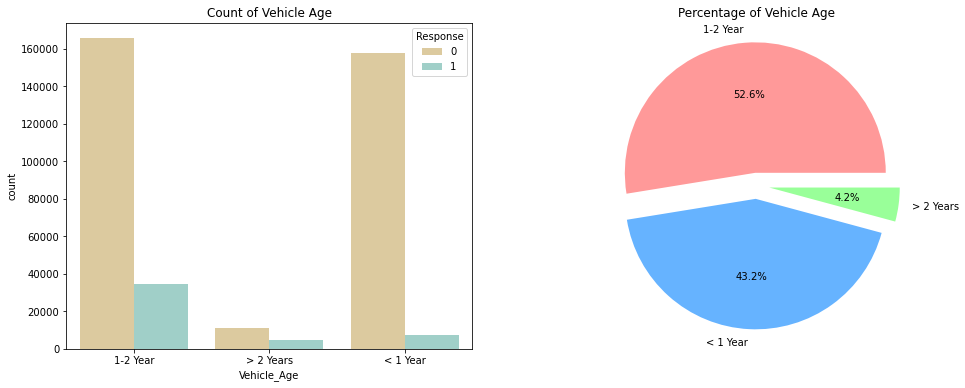

In [27]:
colors = ['#ff9999','#66b3ff','#99ff99']
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.title('Count of Vehicle Age')
sns.countplot(train['Vehicle_Age'], hue=train['Response'], palette=palette[2], 
              order=['1-2 Year', '> 2 Years', '< 1 Year'])

plt.subplot(1,2,2)
plt.pie(train['Vehicle_Age'].value_counts(), explode=[0.1, 0.1, 0.1] , colors=colors ,autopct='%.1f%%',
        labels=['1-2 Year', '< 1 Year', '> 2 Years'], labeldistance=1.1)
plt.title('Percentage of Vehicle Age')
plt.show()

In [28]:
get_response_ratio('Vehicle_Age')

,total,Response=0,Response=1
1-2 Year,200316,165510,34806
< 1 Year,164786,157584,7202
> 2 Years,16007,11305,4702


We see that people having vehicles 1-2 years old have taken insurance and overall very less number of people have shown interest in taking insurance, most of them have not taken insurance.

### Vehical Damage

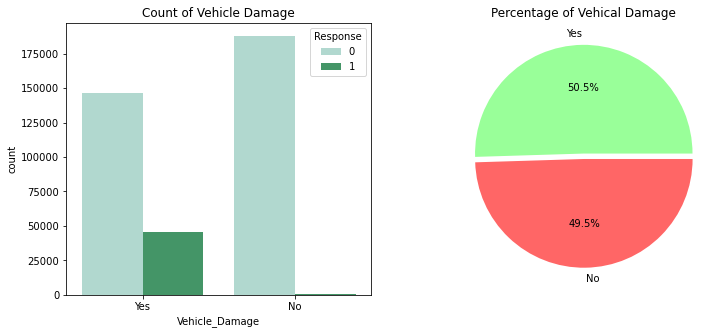

In [29]:
colors = ['#99ff99', '#ff6666']
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Count of Vehicle Damage')
sns.countplot(train['Vehicle_Damage'], palette=palette[3], hue=train['Response'])

plt.subplot(1,2,2)
plt.pie(train['Vehicle_Damage'].value_counts(), explode=[0.05,0] , colors=colors ,autopct='%.1f%%', 
        labels=['Yes', 'No'], labeldistance=1.1)
plt.title('Percentage of Vehical Damage')
plt.show()

In [30]:
get_response_ratio('Vehicle_Damage')

,total,Response=0,Response=1
No,188696,187714,982
Yes,192413,146685,45728


* Customers with damage are far more interested in vehicle insurance.

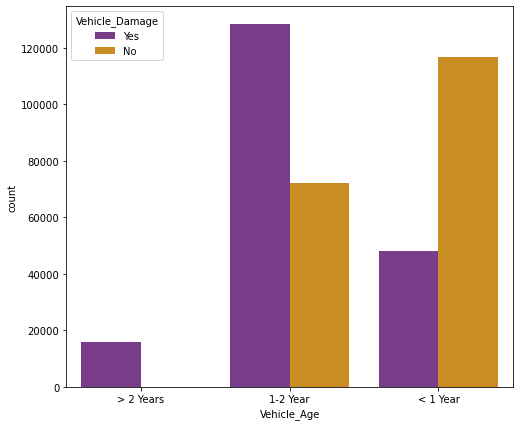

In [31]:
plot_object(train['Vehicle_Age'], palette[4], hue='Vehicle_Damage')

Vehicles 1-2 years old have more damages.

### Previously Insured

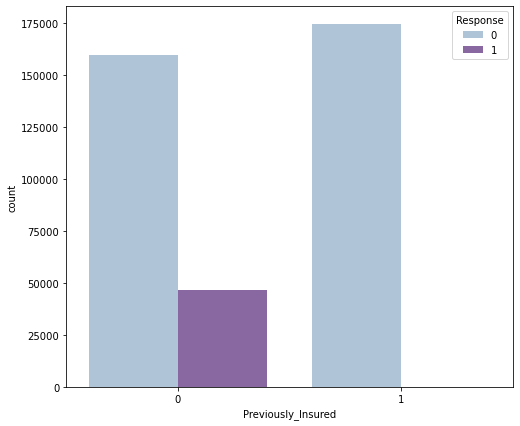

In [32]:
plot_object(train['Previously_Insured'], palette[5])

In [33]:
get_response_ratio('Previously_Insured')

,total,Response=0,Response=1
0,206481,159929,46552
1,174628,174470,158


There are more number of customers who have no previous insurance policy.

### Region Code

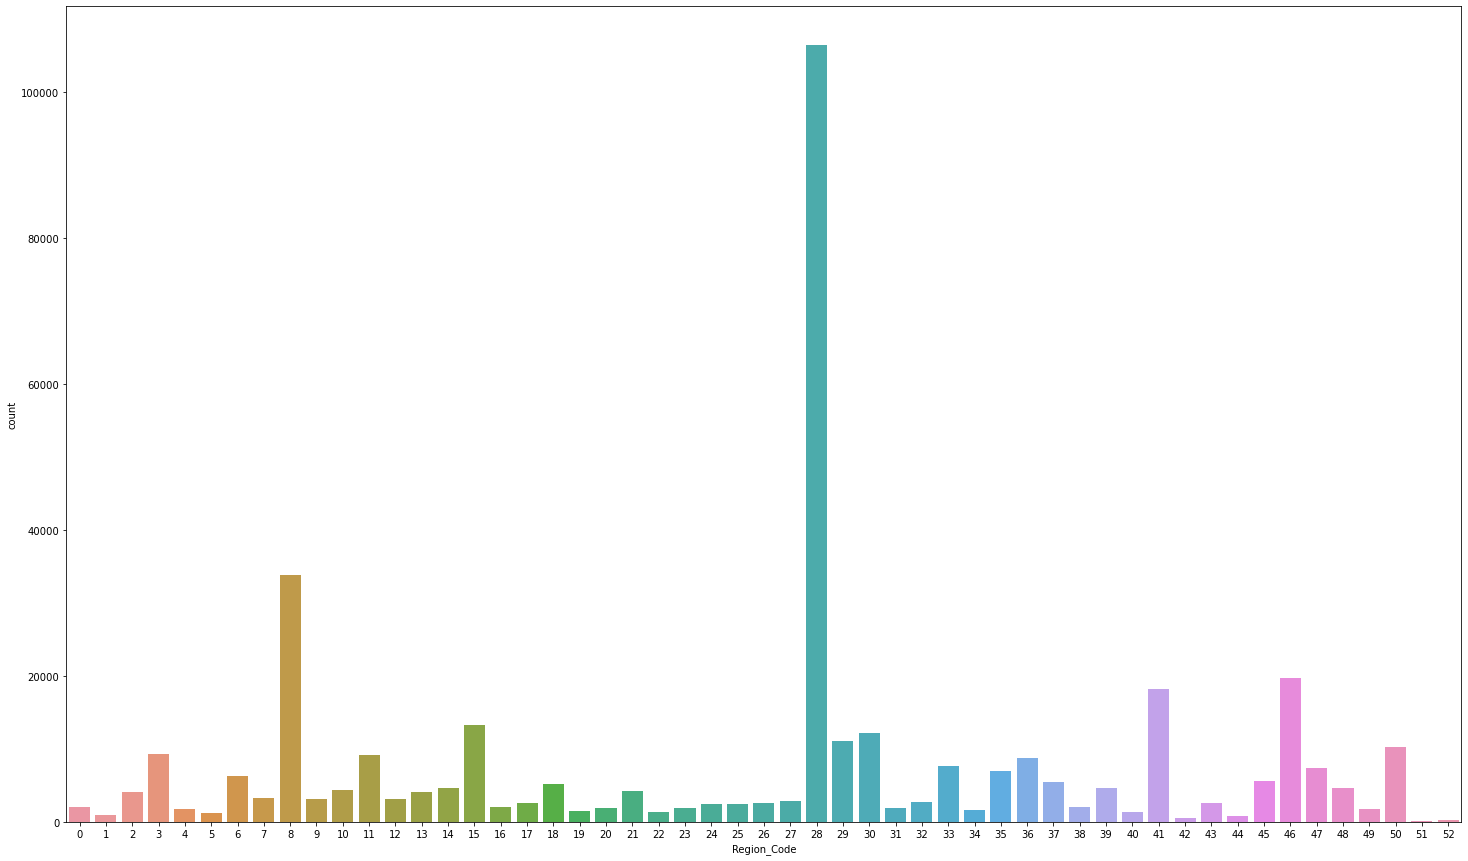

In [34]:
plt.figure(figsize=(25, 15))
sns.countplot("Region_Code", data = train)
plt.show()

Seems like a huge percentage of customers are in region 28.

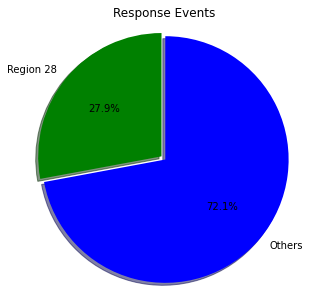

In [35]:
labels ='Region 28', 'Others'
sizes = [len(train[train['Region_Code']==28]), len(train[train['Region_Code']!=28])]
explode = (0, 0.04) 

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, colors=('g','b'), startangle=90)
ax1.set_title("Response Events")
ax1.axis('equal') 

plt.show()

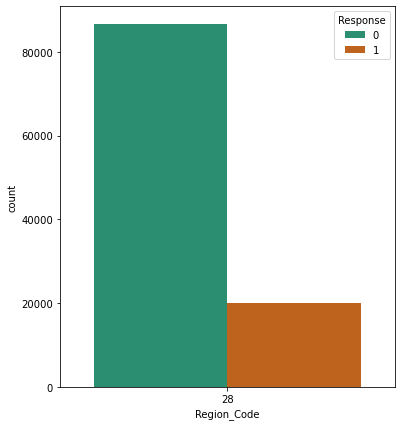

In [36]:
region = train[train["Region_Code"] == 28.0]
plt.subplots(figsize=(6,7))
sns.countplot(x="Region_Code",hue="Response" ,data=region, palette=palette[6])
plt.show()

### Policy Sales Channel

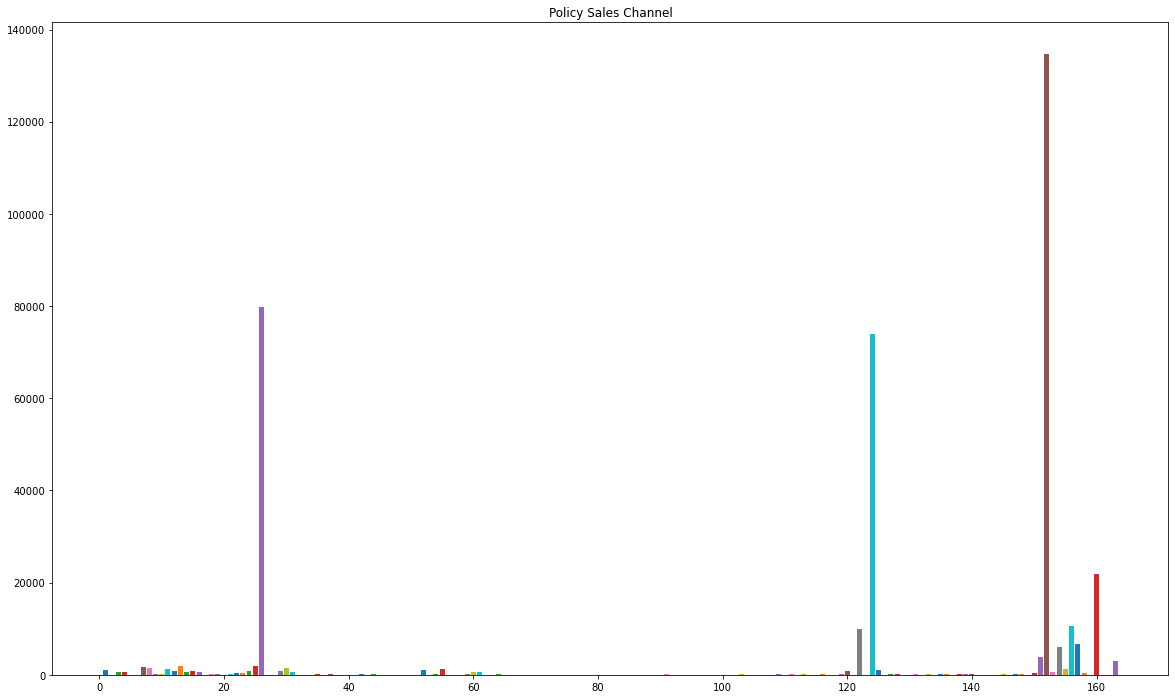

In [37]:
plt.figure(figsize=(20,12))
plt.title('Policy Sales Channel')

for i in sorted(train['Policy_Sales_Channel'].unique()):
    bar= plt.bar(i,len(train[train['Policy_Sales_Channel']==i]))

### Age

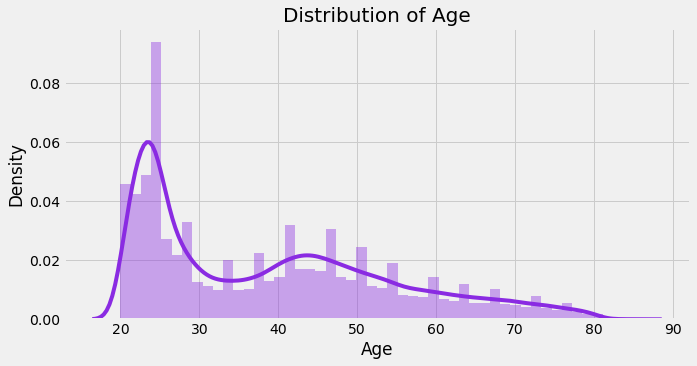

In [38]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 5)
sns.distplot(train['Age'], color = 'BlueViolet')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

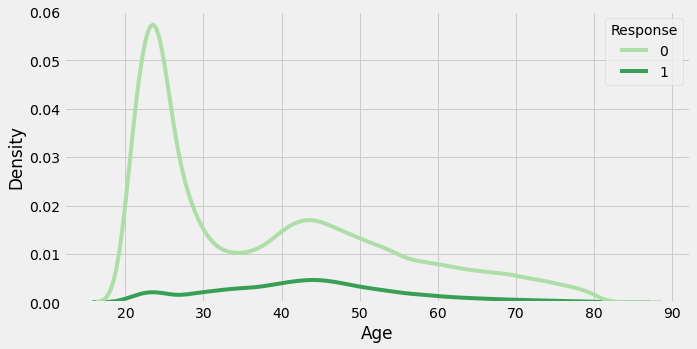

In [39]:
plot_kde('Age', palette[7])

Age group of 40-50 have higher chance of buying the health insurance.

### Annual Premium

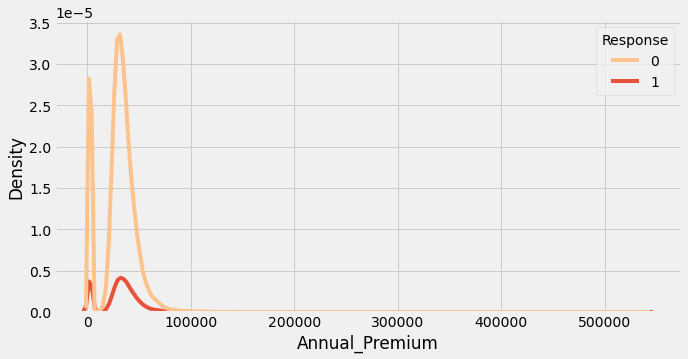

In [40]:
plot_kde('Annual_Premium', palette[8])

### Vintage

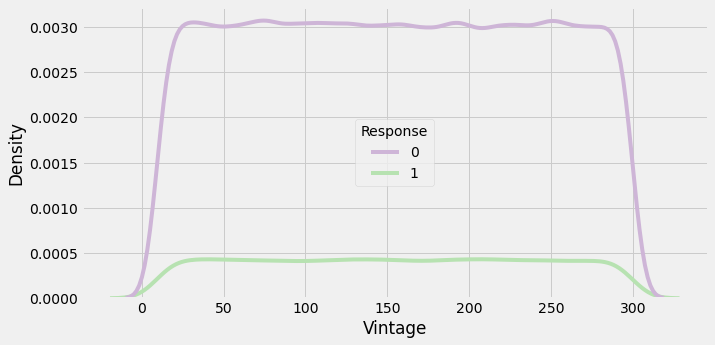

In [41]:
plot_kde('Vintage', palette[9])

### Target Value - Response

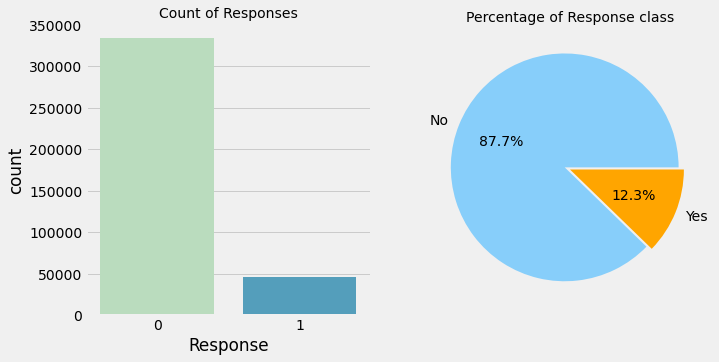

In [42]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(train['Response'], palette=palette[10])
plt.title('Count of Responses', size=14)

plt.subplot(1,2,2)
plt.pie(train['Response'].value_counts(), explode=[0.05,0] , colors=[ 'lightskyblue', 'orange'] ,autopct='%.1f%%', 
        labels=['No', 'Yes'], labeldistance=1.1)
plt.title('Percentage of Response class', size=14)
plt.show()

In [43]:
train['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

We can see that the dataset is highly imbalanced.

## RELATIONSHIPS BETWEEN VARIABLES

### Age vs Gender

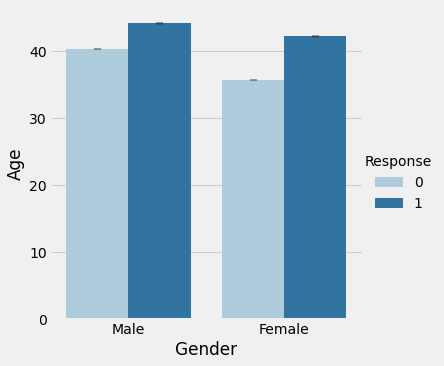

In [44]:
sns.catplot(x='Gender', y='Age', hue = 'Response', kind = 'bar', data = train, palette=palette[11]);

More males have taken insurance as compared to females.

### Gender vs Driving License

In [45]:
gender_dl = train.groupby(["Gender"]).count()["Driving_License"].to_frame().reset_index()
print(gender_dl)

   Gender  Driving_License
0  Female           175020
1    Male           206089


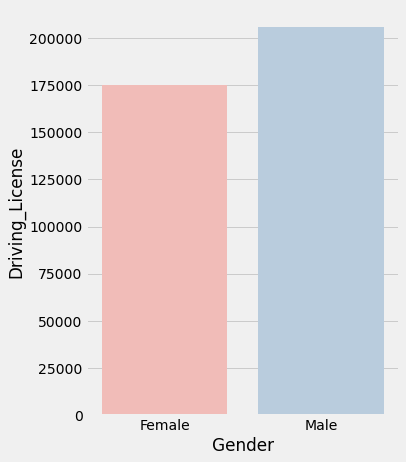

In [46]:
plt.figure(figsize=(5,7))
sns.barplot(x = gender_dl["Gender"], y = gender_dl["Driving_License"], palette=palette[12])
plt.show()

More number of males have driving license.

### Previously Insured vs Gender

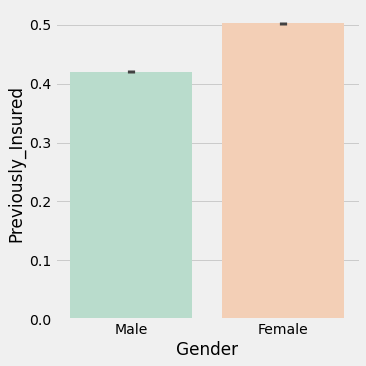

In [47]:
sns.catplot(x='Gender', y='Previously_Insured', kind = 'bar', data = train, palette=palette[13]);

More number of females have vehicle insurance.

### Vehicle Age vs Annual Premium

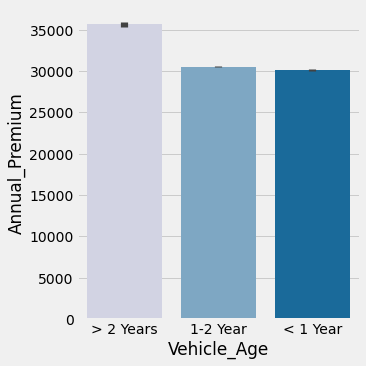

In [48]:
sns.catplot(x='Vehicle_Age', y='Annual_Premium', kind = 'bar', data = train, palette=palette[14]);

People who have vehicle older than 2 years pay more annual premium.

### Vehicle Age vs Vehicle Damage

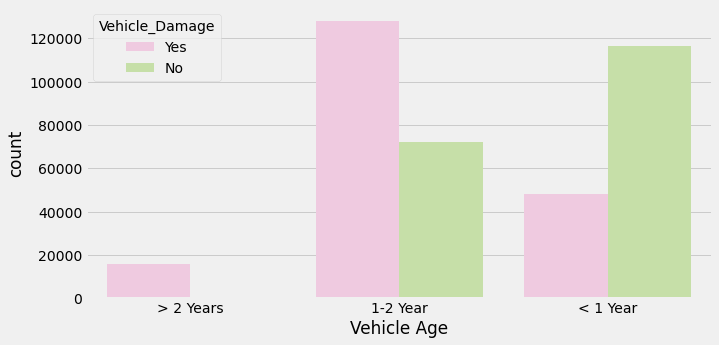

In [49]:
sns.countplot(x="Vehicle_Age", hue="Vehicle_Damage", data=train, palette=palette[15])
plt.xlabel("Vehicle Age")
plt.show()

1-2 year vehicles have more damages .

### Age vs Annual Premium

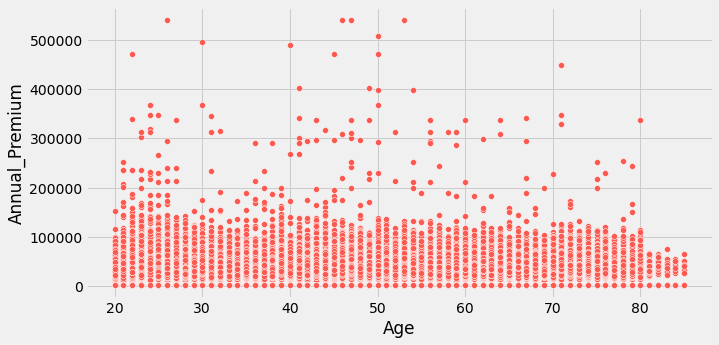

In [50]:
sns.scatterplot(x=train['Age'], y=train['Annual_Premium'], c=["#fc5a50"]);

### Vintage vs Annual Premium

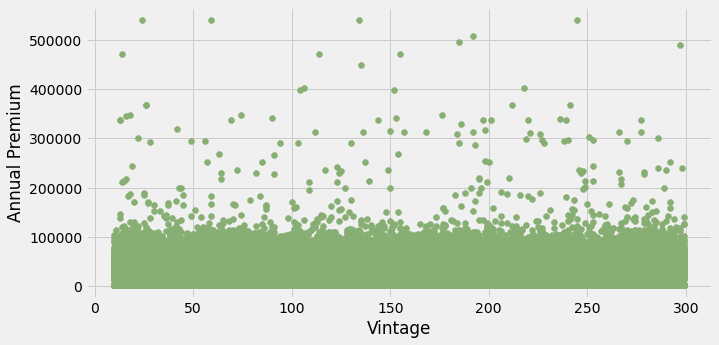

In [51]:
plt.scatter(train["Vintage"], train["Annual_Premium"], c=["#87ae73"])
plt.xlabel("Vintage")
plt.ylabel("Annual Premium")
plt.show()

### Vintage vs Previously Insured

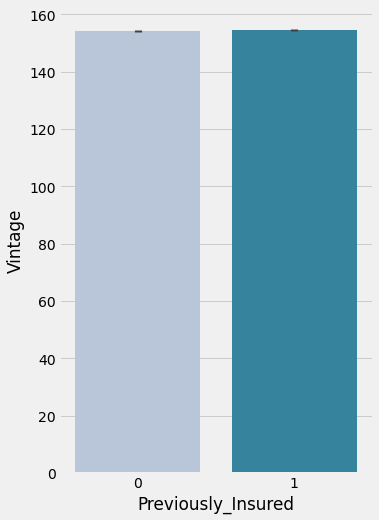

In [52]:
plt.figure(figsize=(5,8))
sns.barplot(train["Previously_Insured"], train["Vintage"], palette=palette[16])
plt.show()

### Policy Sales Channel - Annual Premium

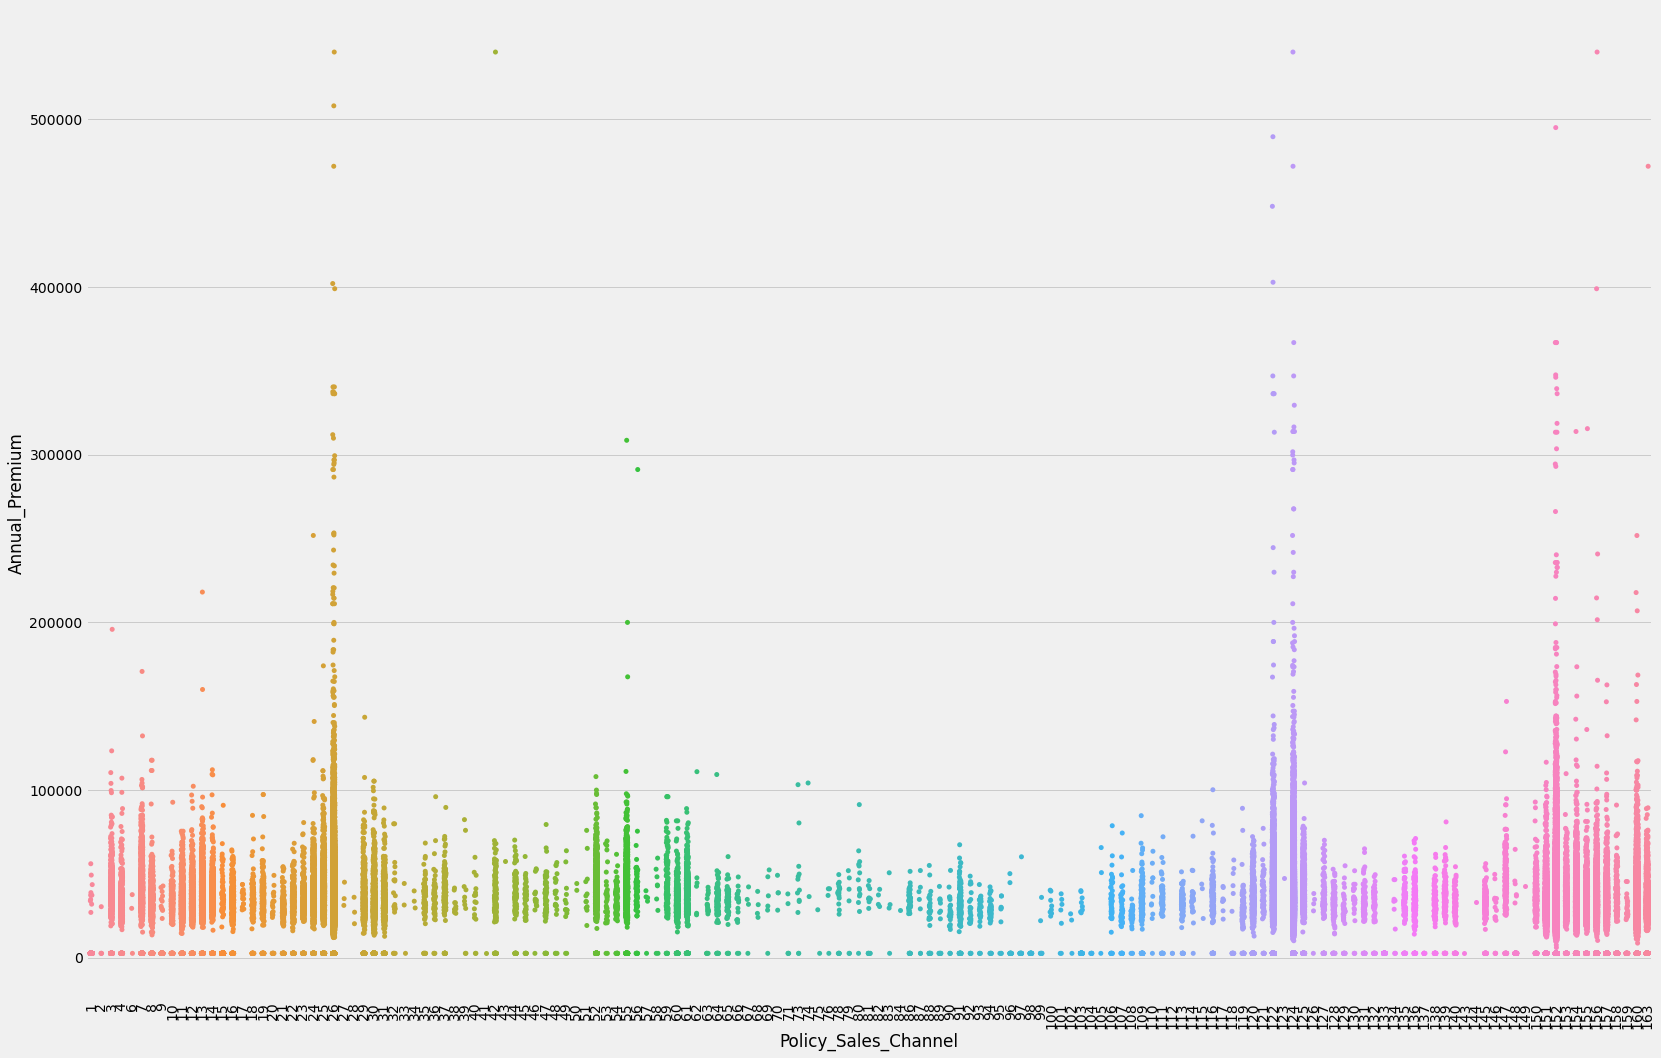

In [53]:
plt.figure(figsize=(25, 17))
plt.xticks(rotation=90)
sns.stripplot(x="Policy_Sales_Channel", y="Annual_Premium", data=train);

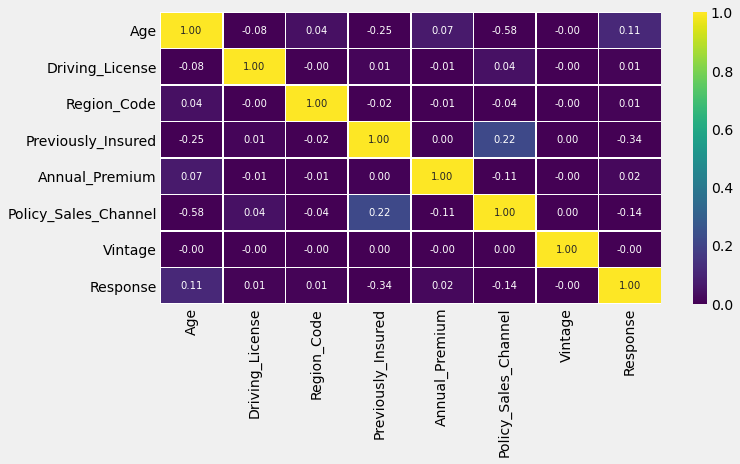

In [54]:
corr_mat = train.corr()
sns.heatmap(corr_mat, annot=True, fmt='.2f', annot_kws={"size": 10}, linewidths=.5, vmin=0, vmax=1, cmap='viridis');

### Skewness of Continuous Variables

If a column in the dataset is skewed it affects the model's performance and therefore we might end up with wrong predictions. Therefore if there's a skewed feature we need to fix it.

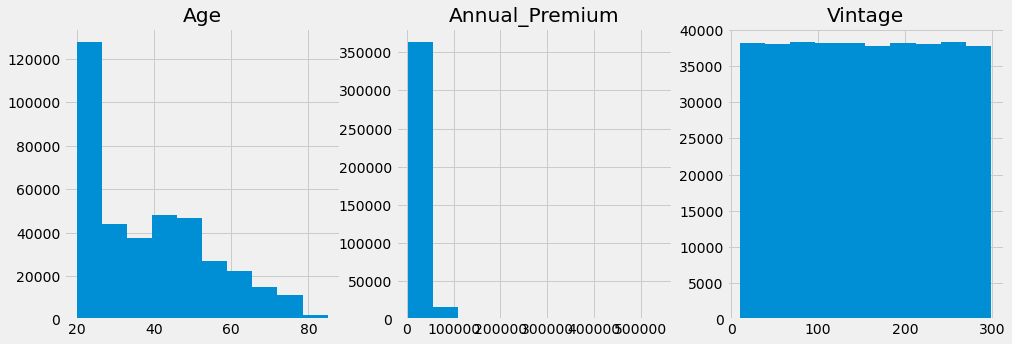

In [55]:
from scipy.stats import skew
skew_data = ['Age', 'Annual_Premium', 'Vintage']

plt.figure(figsize=(15,5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.hist(train[skew_data[i]])
    plt.title(skew_data[i])

In [56]:
for i in range(3):
    print(skew_data[i],"skewness: {:.3f}".format(skew(train[skew_data[i]])))

Age skewness: 0.673
Annual_Premium skewness: 1.766
Vintage skewness: 0.003


We can say that 'Age' feature is moderately skewed and 'Annual_Premium' feature is highly skewed. With 0.003 skewness value 'Vintage' feature is not skewed.

In [57]:
for i in range(2):
    print(skew_data[i],"after log transformation: {:.3f}".format(skew(np.log(train[skew_data[i]]))))

Age after log transformation: 0.204
Annual_Premium after log transformation: -1.471


In [58]:
for i in range(2):
    print(skew_data[i],"after sqrt transformation: {:.3f}".format(skew(np.sqrt(train[skew_data[i]]))))

Age after sqrt transformation: 0.426
Annual_Premium after sqrt transformation: -0.792


In order to get rid of the skewness we can use various methods. In this case it's better to use square root transformation.

In [59]:
for i in range(2):
    train[skew_data[i]] = np.sqrt(train[skew_data[i]])

## Outliers

In [60]:
numeric_features = ['Age', 'Annual_Premium', 'Vintage']

In [61]:
def draw_boxplot(df, features):
    f = pd.melt(df, value_vars=features)
    g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False, size = 5)
    g = g.map(sns.boxplot, "value", orient="v", palette="Blues")
    plt.show()

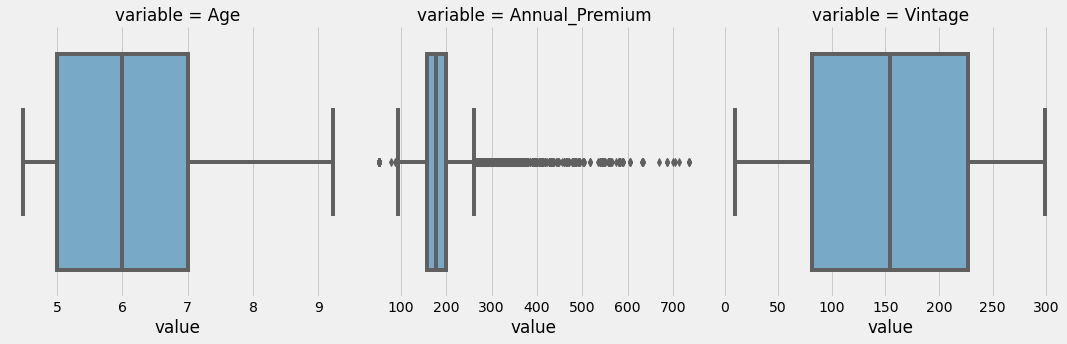

In [62]:
draw_boxplot(train, numeric_features)

From the boxplots we can see that 'Annual_Premium' feature has outliers.

In [63]:
from scipy.stats import zscore

def calc_z_scores(col):
    z_scores = zscore(col.dropna())
    for threshold in range(1,5):
        print("Threshold value: {}".format(threshold))
        print("Number of Outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
        print('------')

In [64]:
calc_z_scores(train["Annual_Premium"])

Threshold value: 1
Number of Outliers: 33310
------
Threshold value: 2
Number of Outliers: 2549
------
Threshold value: 3
Number of Outliers: 389
------
Threshold value: 4
Number of Outliers: 174
------


In [65]:
from scipy.stats.mstats import winsorize

train["Annual_Premium"]= winsorize(np.array(train["Annual_Premium"].dropna()), (0.20, 0.10))

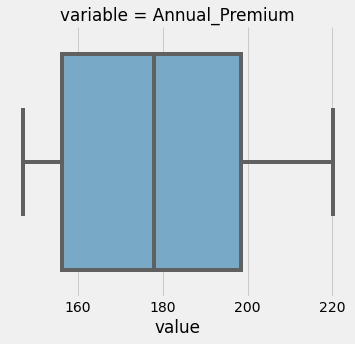

In [66]:
draw_boxplot(train, numeric_features[1])

In [67]:
calc_z_scores(train["Annual_Premium"])

Threshold value: 1
Number of Outliers: 77469
------
Threshold value: 2
Number of Outliers: 0
------
Threshold value: 3
Number of Outliers: 0
------
Threshold value: 4
Number of Outliers: 0
------


In [68]:
df1 = train.copy()

## Feature Engineering

### Converting Categorical Columns to Numerical

In [69]:
def get_uniques(df, columns):
    return {column: list(df[column].unique()) for column in columns}

def get_categorical_columns(df):
    return df.dtypes[df.dtypes == "object"].index

In [70]:
get_uniques(train, get_categorical_columns(train))

{'Gender': ['Male', 'Female'],
 'Vehicle_Age': ['> 2 Years', '1-2 Year', '< 1 Year'],
 'Vehicle_Damage': ['Yes', 'No']}

In [71]:
train['Vehicle_Damage'] = train['Vehicle_Damage'].map({'Yes': 0, 'No':1})
train['Gender'] = train['Gender'].map({'Male': 0, 'Female': 1})
test['Vehicle_Damage'] = test['Vehicle_Damage'].map({'Yes': 0, 'No':1})
test['Gender'] = test['Gender'].map({'Male': 0, 'Female': 1})

In [72]:
train = pd.get_dummies(train, columns = ['Vehicle_Age'], drop_first=True)
test = pd.get_dummies(test, columns = ['Vehicle_Age'], drop_first=True)

In [73]:
train.rename(columns={"Vehicle_Age_< 1 Year": "1_year_below", "Vehicle_Age_> 2 Years": "2_years_above"}, inplace=True)
test.rename(columns={"Vehicle_Age_< 1 Year": "1_year_below", "Vehicle_Age_> 2 Years": "2_years_above"}, inplace=True)

In [74]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,1_year_below,2_years_above
0,0,6.633250,1,28,0,0,201.131798,26,217,1,0,1
1,0,8.717798,1,3,0,1,183.128370,26,183,0,0,0
2,0,6.855655,1,28,0,0,195.688528,26,27,1,0,1
3,0,4.582576,1,11,1,1,169.171511,152,203,0,1,0
4,1,5.385165,1,41,1,1,165.819179,152,39,0,1,0


In [75]:
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,1_year_below,2_years_above
0,0,25,1,11,1,1,35786,152,53,1,0
1,0,40,1,28,0,0,33762,7,111,0,0
2,0,47,1,28,0,0,40050,124,199,0,0
3,0,24,1,27,1,0,37356,152,187,1,0
4,0,27,1,28,1,1,59097,152,297,1,0


In [76]:
df2 = train.copy()

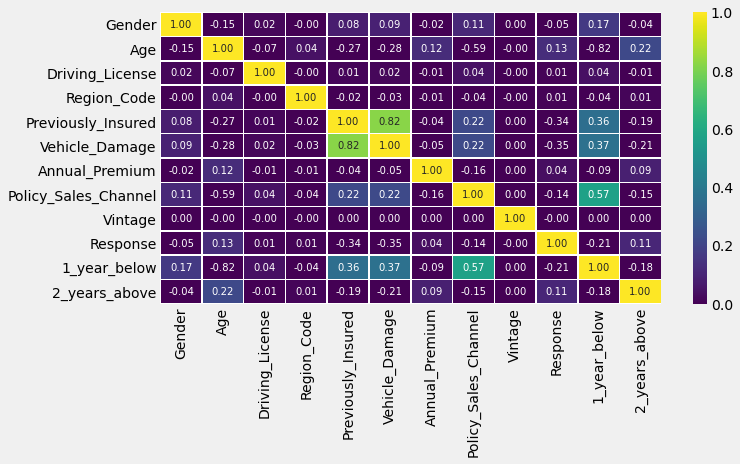

In [77]:
corr_mat = train.corr()
sns.heatmap(corr_mat, annot=True, fmt='.2f', annot_kws={"size": 10}, linewidths=.5, vmin=0, vmax=1, cmap='viridis');

## Principal Components Analysis

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = train.drop('Response', axis=1)
comp = len(X.columns)

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=comp)
principalComponents = pca.fit_transform(X_scaled)

In [79]:
exp_var= pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print(cumsum_var)

[0.27231782 0.12351809 0.09249908 0.09093539 0.09078745 0.08965417
 0.08526895 0.08010168 0.04352289 0.01596756 0.01542692]
[ 27.23  39.58  48.83  57.92  67.    75.97  84.5   92.51  96.86  98.46
 100.  ]


The first principal component explains 27.23% of the variation in the original data while the second principal component explains 12.35% of the variation in the original data.

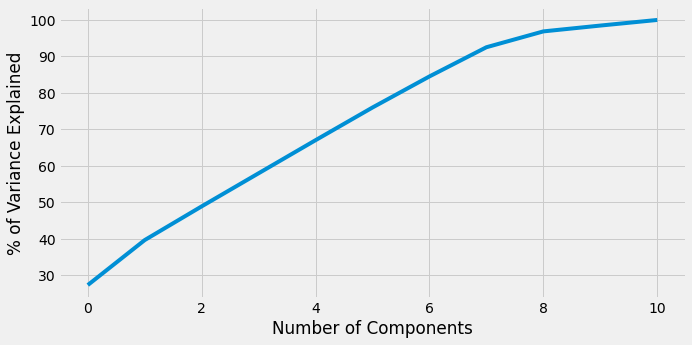

In [80]:
plt.plot(cumsum_var)
plt.xlabel('Number of Components')
plt.ylabel('% of Variance Explained')
plt.show()

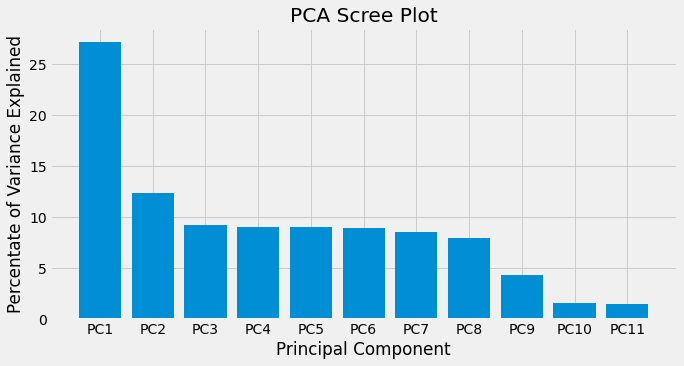

In [81]:
percent_variance = np.round(exp_var * 100, decimals =2)
columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8', 'PC9', 'PC10', 'PC11']
plt.bar(x= range(1,12), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [82]:
n_PCA_80 = np.size(np.cumsum(pca.explained_variance_ratio_)>0.8) - np.count_nonzero(np.cumsum(pca.explained_variance_ratio_)>0.8)
print(n_PCA_80, "components explain 80% of variance.")

6 components explain 80% of variance.


<Figure size 1440x936 with 0 Axes>

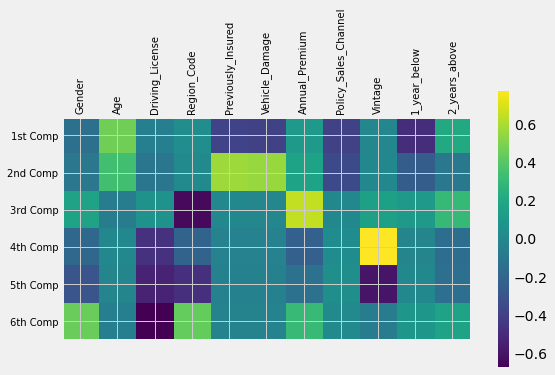

In [83]:
pca = PCA(n_components=n_PCA_80)
principalComponents=pca.fit_transform(X_scaled)

plt.figure(figsize=(20,13))
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3,4,5],['1st Comp','2nd Comp','3rd Comp','4th Comp', '5th Comp','6th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(list(range(11)),X,fontsize=10,rotation=90)
plt.tight_layout()
plt.show()

## Preprocessing

In [84]:
features = train.columns
num = ['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']
train_prep = train[features]

In [85]:
train_prep.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,1_year_below,2_years_above
0,0,6.633250,1,28,0,0,201.131798,26,217,1,0,1
1,0,8.717798,1,3,0,1,183.128370,26,183,0,0,0
2,0,6.855655,1,28,0,0,195.688528,26,27,1,0,1
3,0,4.582576,1,11,1,1,169.171511,152,203,0,1,0
4,1,5.385165,1,41,1,1,165.819179,152,39,0,1,0


In [86]:
from sklearn.preprocessing import MinMaxScaler
std = MinMaxScaler()
train_prep[num] = std.fit_transform(train_prep[num])

In [87]:
test_prep = test.copy()
test_prep[num] = std.fit_transform(test_prep[num])

In [88]:
train_prep.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,1_year_below,2_years_above
0,0,0.455220,1,0.538462,0,0,0.741130,0.154321,0.716263,1,0,1
1,0,0.894311,1,0.057692,0,1,0.495043,0.154321,0.598616,0,0,0
2,0,0.502067,1,0.538462,0,0,0.666727,0.154321,0.058824,1,0,1
3,0,0.023263,1,0.211538,1,1,0.304269,0.932099,0.667820,0,1,0
4,1,0.192322,1,0.788462,1,1,0.258446,0.932099,0.100346,0,1,0


In [89]:
test_prep.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,1_year_below,2_years_above
0,0,0.076923,1,0.211538,1,1,0.070633,0.932099,0.148789,1,0
1,0,0.307692,1,0.538462,0,0,0.066321,0.037037,0.349481,0,0
2,0,0.415385,1,0.538462,0,0,0.079717,0.759259,0.653979,0,0
3,0,0.061538,1,0.519231,1,0,0.073978,0.932099,0.612457,1,0
4,0,0.107692,1,0.538462,1,1,0.120293,0.932099,0.993080,1,0


## Split the Target Value

In [90]:
X = train_prep.drop('Response', axis=1)
y = train_prep['Response']

## Balancing The Dataset (Oversampling)

In [91]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=46, sampling_strategy=1.0)
X_smote, y_smote = sm.fit_resample(X, y)

## Splitting The Dataset

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=11)

## Clustering

In [93]:
from sklearn import metrics

def get_cluster_results(model):
    labels = model.predict(X_smote)
    print("RI Score: {:.2f}".format(metrics.rand_score(y_smote, labels)))
    print("ARI Score: {:.2f}".format(metrics.adjusted_rand_score(y_smote, labels)))
    
    pca_2= PCA(n_components=2)
    pca= pca_2.fit_transform(X_smote)
    df_pca= pd.DataFrame(pca, columns={"D_1", "D_2"})

    plt.figure(figsize=(12,8))
    sns.scatterplot(x=pca[:,0], y=pca[:,1], hue=labels)
    plt.show()

### Mini Batch KMeans

In [95]:
from sklearn.cluster import MiniBatchKMeans

mini_batch_kmeans = MiniBatchKMeans(n_clusters=2, batch_size=200, max_iter=100, random_state=123).fit(X_smote)

RI Score: 0.64
ARI Score: -0.21


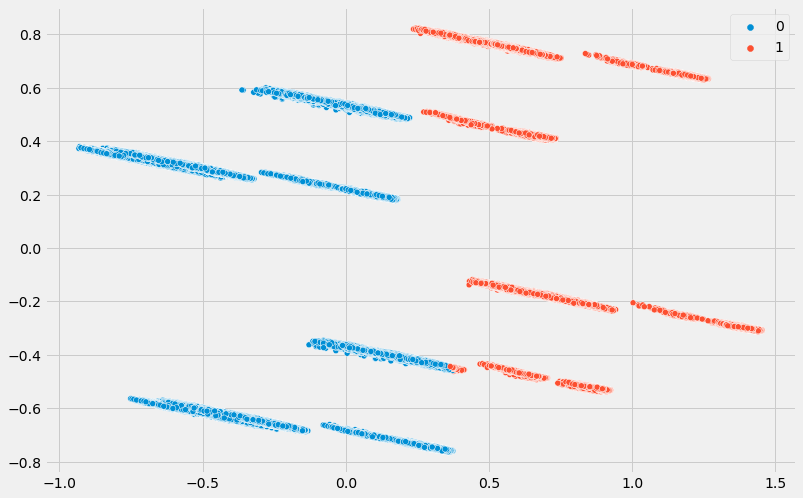

In [96]:
get_cluster_results(mini_batch_kmeans)

### BIRCH Clustering

In [97]:
from sklearn.cluster import Birch

birch = Birch(n_clusters=2, branching_factor=100, threshold=.75).fit(X_smote)

RI Score: 0.64
ARI Score: 3.63


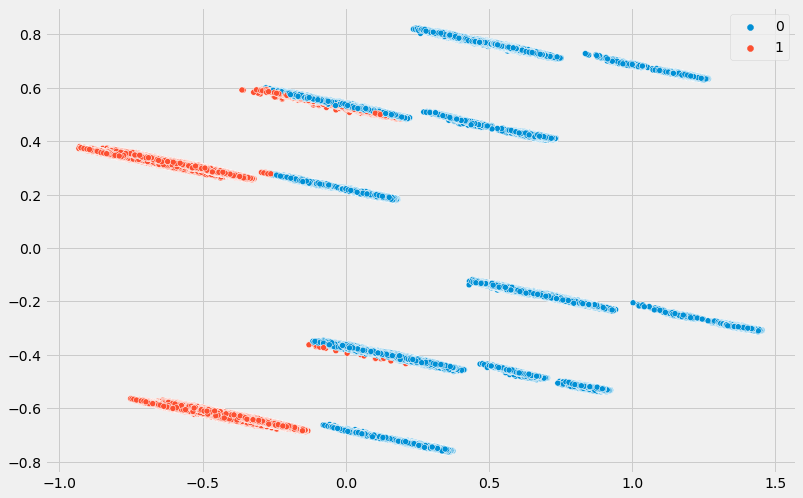

In [98]:
get_cluster_results(birch)

### Gaussian Mixture Model

In [99]:
from sklearn.mixture import GaussianMixture as GMM
 
gmm = GMM(n_components = 2, covariance_type='diag', tol=1e-6, max_iter=100, random_state=11).fit(X_smote)

RI Score: 0.66
ARI Score: -0.03


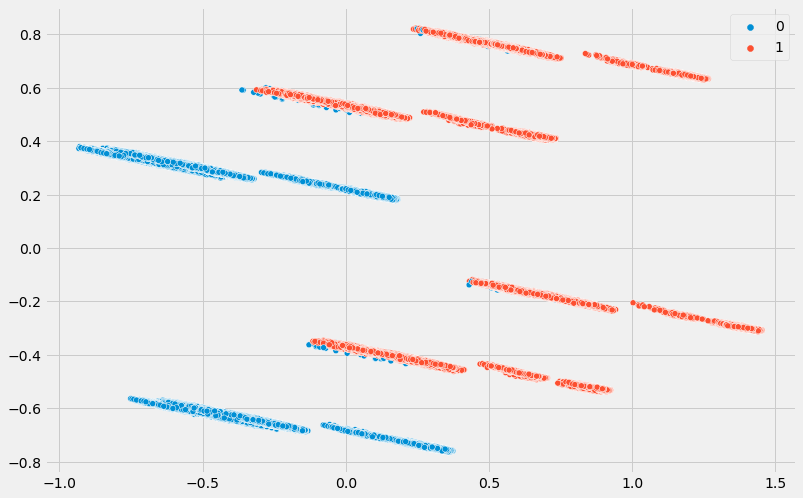

In [100]:
get_cluster_results(gmm)

## Defining Functions

In [101]:
classes = ['not interested', 'interested']

In [102]:
from yellowbrick.classifier import ClassificationReport

def class_report(model):
    visualizer = ClassificationReport(model, classes=classes, cmap='GnBu')
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    g = visualizer.poof()

In [103]:
from yellowbrick.classifier import ClassPredictionError

def class_pred_error(model):
    visualizer = ClassPredictionError(model, classes=classes)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show();

In [104]:
from yellowbrick.classifier import ConfusionMatrix

def plot_confusion_matrix(model):
    cm = ConfusionMatrix(model, classes=classes, cmap='RdPu')
    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()

In [105]:
from yellowbrick.classifier import ROCAUC

def plot_roc_auc(model):
    visualizer = ROCAUC(model, classes=classes)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show();

In [106]:
from yellowbrick.classifier import PrecisionRecallCurve

def plot_pr_curve(model):
    pr_curve = PrecisionRecallCurve(model,
             classes=classes,
             ap_score=True,
             iso_f1_curves=True,
             fig=plt.figure(figsize=(7,5)))
    pr_curve.fit(X_train, y_train)
    pr_curve.score(X_test, y_test)
    pr_curve.show();

In [107]:
def print_score(model):
    pred_train = model.predict(X_train)
    train_acc = accuracy_score(y_train, pred_train)
    print("Train Accuracy: {:.2f}%".format(train_acc * 100))
        
    pred_test = model.predict(X_test)
    test_acc = accuracy_score(y_test, pred_test)
    print("Test Accuracy: {:.2f}%".format(test_acc * 100))
    
    return train_acc, test_acc

In [108]:
def model_evaluate(model):
    acc_train = model.score(X_train, y_train)
    acc_test = model.score(X_test, y_test)
    
    return acc_train, acc_test

In [109]:
def get_results(param_names, results):
    df_results = pd.DataFrame(results)
    df_results = df_results[param_names]
    df_results = df_results.sort_values(by='mean_test_score', ascending = False)
    display(df_results.head(10))

In [110]:
def get_evaluations(model):
    class_report(model)
    class_pred_error(model)
    plot_confusion_matrix(model)
    plot_roc_auc(model)
    plot_pr_curve(model)

## Modeling

## 1. Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression(random_state=123)
log_reg.fit(X_train, y_train)

accuracy_train_logreg, accuracy_test_logreg = model_evaluate(log_reg)

print('Accuracy on Train Data : {:.3f}'.format(accuracy_train_logreg)) 
print('Accuracy on Test Data  : {:.3f}'.format(accuracy_test_logreg))

Accuracy on Train Data : 0.783
Accuracy on Test Data  : 0.783


### Logistic Regression Hyperparameter Tuning

In [112]:
from sklearn.model_selection import GridSearchCV

parameters = {"C": [1e-06, 1e-05, 1e-04, 1e-03],
              "penalty": ['l1','l2'],
              "max_iter":[400,450,500],
              "solver":['newton-cg', 'lbfgs', 'liblinear']
             }

grid_cv = GridSearchCV(estimator=log_reg, param_grid=parameters, cv=3)
grid_cv.fit(X_train, y_train)

results = grid_cv.cv_results_
param_names = ['param_penalty','param_C', 'param_max_iter', 'param_solver','mean_test_score']

get_results(param_names, results)

,param_penalty,param_C,param_max_iter,param_solver,mean_test_score
33,l2,1e-05,500,newton-cg,0.788294
21,l2,1e-05,400,newton-cg,0.788294
27,l2,1e-05,450,newton-cg,0.788294
28,l2,1e-05,450,lbfgs,0.788290
22,l2,1e-05,400,lbfgs,0.788290
34,l2,1e-05,500,lbfgs,0.788290
41,l2,0.0001,400,liblinear,0.784292
53,l2,0.0001,500,liblinear,0.784292
47,l2,0.0001,450,liblinear,0.784292
44,l1,0.0001,450,liblinear,0.784283


In [113]:
best_params = grid_cv.best_params_
print('Best parameters: ',best_params)

lr_clf = LogisticRegression(**best_params, random_state=123)
lr_clf.fit(X_train, y_train)

test_prediction_proba = lr_clf.predict_proba(X_test)[:,1]
lr_auc = roc_auc_score(y_test, test_prediction_proba)

y_pred_lr = lr_clf.predict(X_test)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)

lr_train_acc, lr_test_acc = print_score(lr_clf)

Best parameters:  {'C': 1e-05, 'max_iter': 400, 'penalty': 'l2', 'solver': 'newton-cg'}
Train Accuracy: 78.82%
Test Accuracy: 78.78%


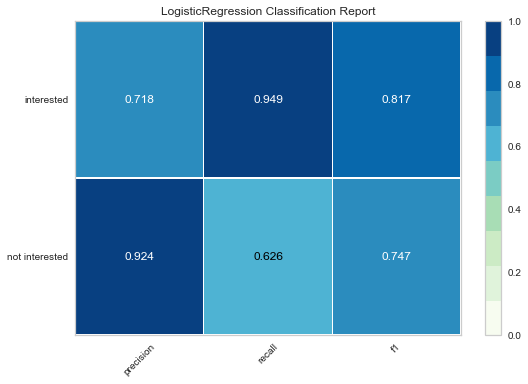

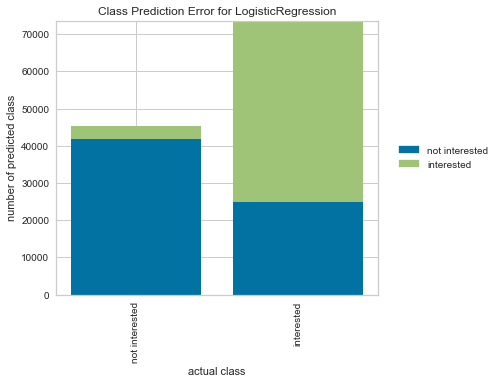

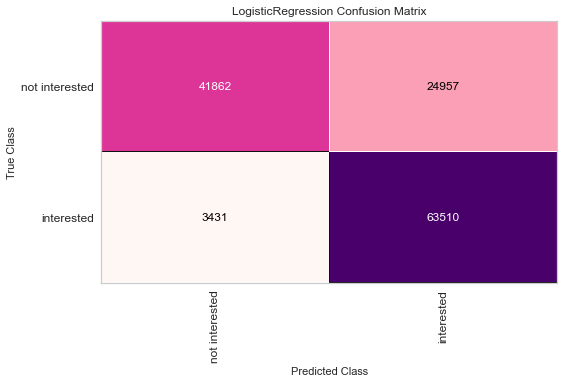

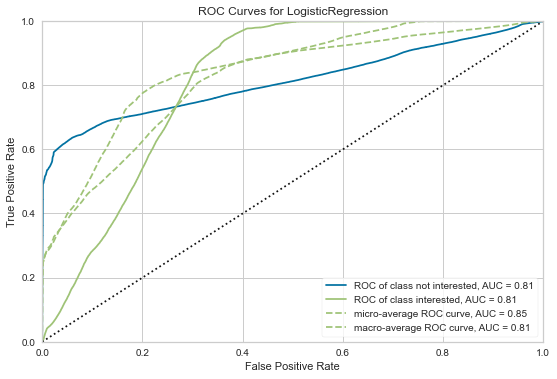

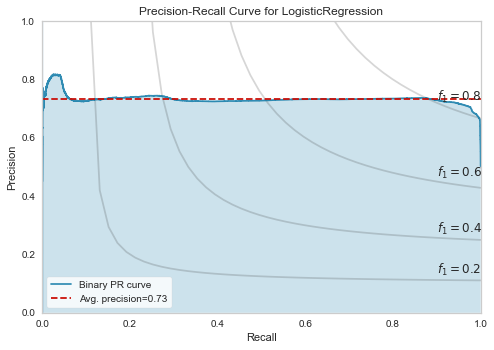

In [114]:
get_evaluations(lr_clf)

In [115]:
columns = ['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Score', 'Precision', 'Recall']
tuning_results_df = pd.DataFrame(data=[["Logistic Regression", lr_train_acc, lr_test_acc, lr_auc, lr_precision, lr_recall]], 
                          columns=columns)
tuning_results_df

,Model,Training Accuracy,Testing Accuracy,AUC Score,Precision,Recall
0,Logistic Regression,0.788226,0.787769,0.812672,0.717895,0.948746


## 2. Decision Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state = 123)
decision_tree.fit(X_train, y_train)

accuracy_train_decisiontree, accuracy_test_decisiontree = model_evaluate(decision_tree)

print('Accuracy on Train Data : {:.3f}'.format(accuracy_train_decisiontree)) 
print('Accuracy on Test Data  : {:.3f}'.format(accuracy_test_decisiontree))

Accuracy on Train Data : 0.999
Accuracy on Test Data  : 0.894


### Decision Tree Hyperparameter Tuning

In [117]:
parameters = {"criterion": ['gini', 'entropy'],
              "splitter": ['best', 'random'],
              "max_depth": [20, 25],
              "min_samples_split":[2, 3, 4],
              "min_samples_leaf": [1, 2, 3],
              "max_features":['auto', 'sqrt', 'log2']
             }

grid_cv = GridSearchCV(estimator=decision_tree, param_grid = parameters, cv=3)
grid_cv.fit(X_train, y_train)

results = grid_cv.cv_results_
param_names = ['param_criterion','param_splitter', 'param_max_depth', 'param_min_samples_split','param_min_samples_leaf',
               'param_max_features','mean_test_score']

In [118]:
get_results(param_names, results)

,param_criterion,param_splitter,param_max_depth,param_min_samples_split,param_min_samples_leaf,param_max_features,mean_test_score
54,gini,best,25,2,1,auto,0.845860
72,gini,best,25,2,1,sqrt,0.845860
90,gini,best,25,2,1,log2,0.845860
84,gini,best,25,2,3,sqrt,0.843663
106,gini,best,25,4,3,log2,0.843663
66,gini,best,25,2,3,auto,0.843663
104,gini,best,25,3,3,log2,0.843663
68,gini,best,25,3,3,auto,0.843663
102,gini,best,25,2,3,log2,0.843663
70,gini,best,25,4,3,auto,0.843663


In [119]:
best_params = grid_cv.best_params_
print('Best_params: ',best_params)

dt_clf = DecisionTreeClassifier(**best_params, random_state=123)
dt_clf.fit(X_train, y_train)

test_prediction_proba = dt_clf.predict_proba(X_test)[:,1]
dt_auc = roc_auc_score(y_test, test_prediction_proba)

y_pred_dt = dt_clf.predict(X_test)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)

dt_train_acc, dt_test_acc = print_score(dt_clf)

Best_params:  {'criterion': 'gini', 'max_depth': 25, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Train Accuracy: 88.67%
Test Accuracy: 84.73%


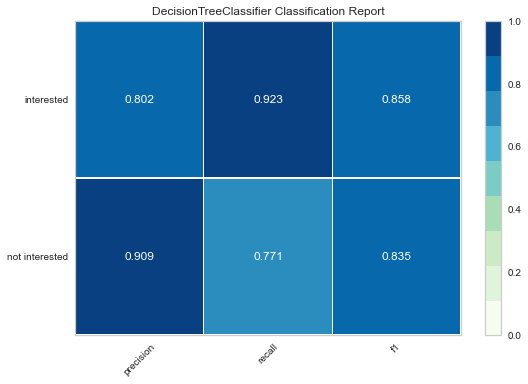

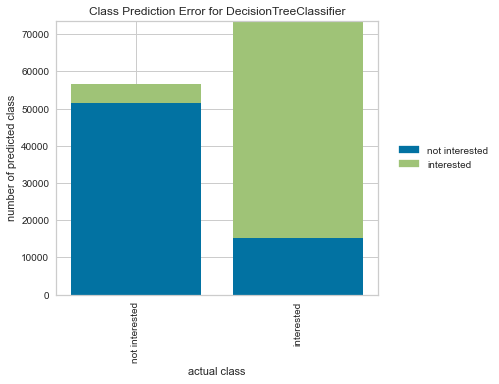

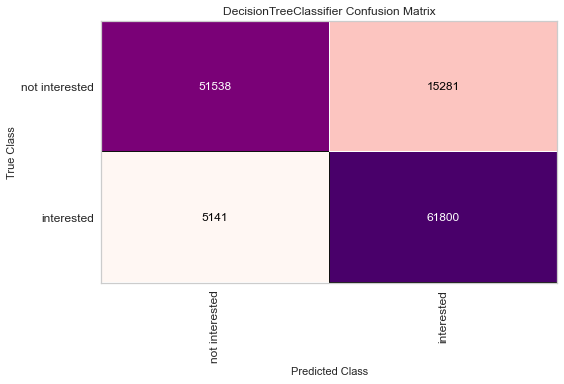

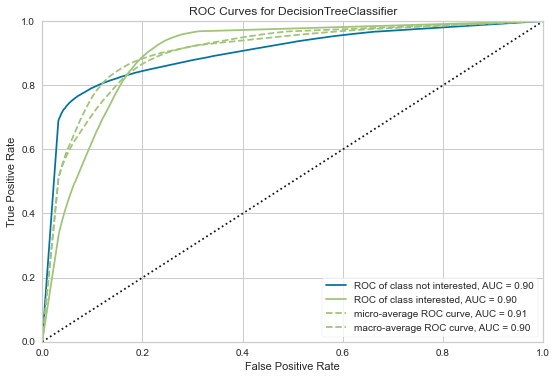

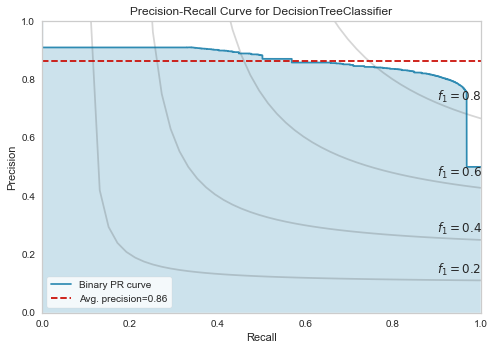

In [120]:
get_evaluations(dt_clf)

In [121]:
results_df_2 = pd.DataFrame(data=[["Decision Tree", dt_train_acc, dt_test_acc, dt_auc, dt_precision, dt_recall]], 
                          columns=columns)
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy,Testing Accuracy,AUC Score,Precision,Recall
0,Logistic Regression,0.788226,0.787769,0.812672,0.717895,0.948746
1,Decision Tree,0.886707,0.847324,0.898434,0.801754,0.923201


## 3. Random Forest

In [122]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=123)
random_forest.fit(X_train, y_train)

accuracy_train_randomforest, accuracy_test_randomforest = model_evaluate(random_forest)

print('Accuracy on Train Data : {:.3f}'.format(accuracy_train_randomforest)) 
print('Accuracy on Test Data  : {:.3f}'.format(accuracy_test_randomforest))

Accuracy on Train Data : 0.999
Accuracy on Test Data  : 0.917


### Random Forest Hyperparameter Tuning

In [123]:
parameters = {"n_estimators": [41],
              "criterion": ['gini', 'entropy'],
              "max_depth":[26],
              "min_samples_split":[3, 4],
              "max_features":['auto', 'sqrt', 'log2']
             }

grid_cv = GridSearchCV(estimator=random_forest, param_grid = parameters, cv = 3)
grid_cv.fit(X_train, y_train)

results = grid_cv.cv_results_
param_names = ['param_n_estimators', 'param_criterion', 'param_max_depth', 'param_min_samples_split','param_max_features','mean_test_score']

get_results(param_names, results)

,param_n_estimators,param_criterion,param_max_depth,param_min_samples_split,param_max_features,mean_test_score
0,41,gini,26,3,auto,0.872289
2,41,gini,26,3,sqrt,0.872289
4,41,gini,26,3,log2,0.872289
1,41,gini,26,4,auto,0.872189
3,41,gini,26,4,sqrt,0.872189
5,41,gini,26,4,log2,0.872189
6,41,entropy,26,3,auto,0.869250
8,41,entropy,26,3,sqrt,0.869250
10,41,entropy,26,3,log2,0.869250
7,41,entropy,26,4,auto,0.868867


In [124]:
best_params = grid_cv.best_params_
print('Best parameters: ', best_params)

rf_clf = RandomForestClassifier(**best_params, random_state=123)
rf_clf.fit(X_train, y_train)

test_prediction_proba = rf_clf.predict_proba(X_test)[:,1]
rf_auc = roc_auc_score(y_test, test_prediction_proba)

y_pred_rf = rf_clf.predict(X_test)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)

rf_train_acc, rf_test_acc = print_score(rf_clf)

Best parameters:  {'criterion': 'gini', 'max_depth': 26, 'max_features': 'auto', 'min_samples_split': 3, 'n_estimators': 41}
Train Accuracy: 91.68%
Test Accuracy: 87.64%


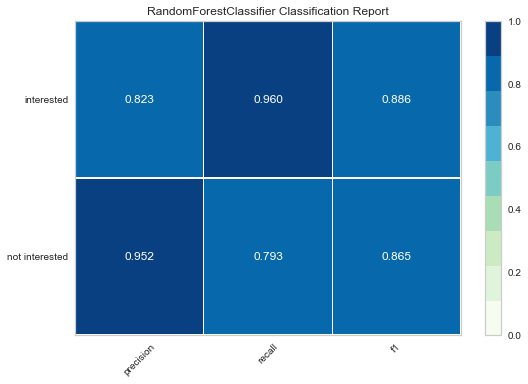

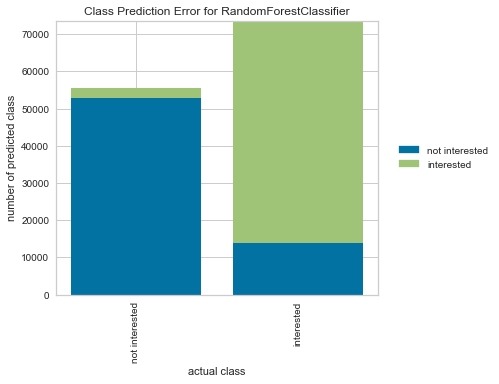

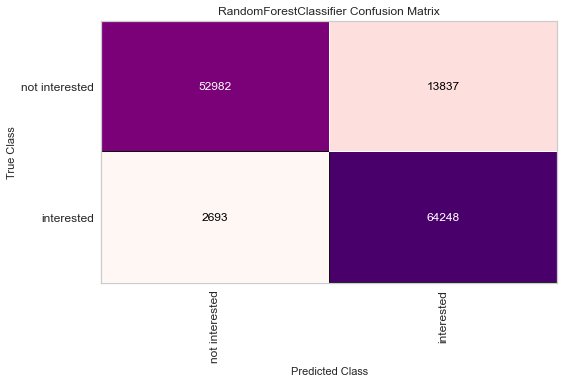

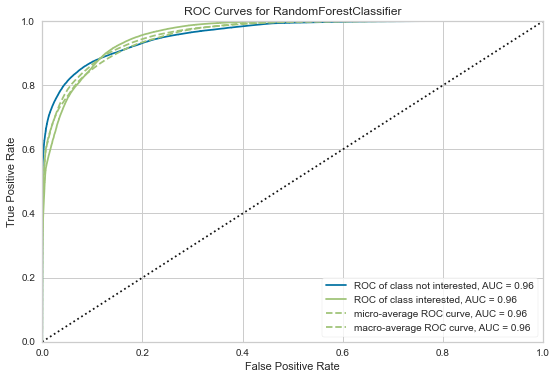

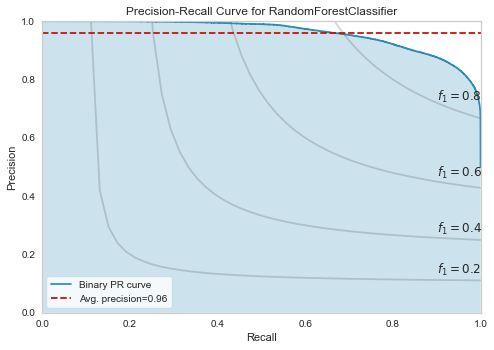

In [125]:
get_evaluations(rf_clf)

In [126]:
results_df_2 = pd.DataFrame(data=[["Random Forest", rf_train_acc, rf_test_acc, rf_auc, rf_precision, rf_recall]], 
                          columns=columns)
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy,Testing Accuracy,AUC Score,Precision,Recall
0,Logistic Regression,0.788226,0.787769,0.812672,0.717895,0.948746
1,Decision Tree,0.886707,0.847324,0.898434,0.801754,0.923201
2,Random Forest,0.916752,0.876420,0.960359,0.822796,0.959771


## 4. XGBoost

In [127]:
from xgboost.sklearn import XGBClassifier

xgboost = XGBClassifier(objective="reg:logistic", seed=11)
xgboost.fit(X_train, y_train)

accuracy_train_xgb, accuracy_test_xgb = model_evaluate(xgboost)

print('Accuracy on Train Data : {:.3f}'.format(accuracy_train_xgb)) 
print('Accuracy on Test Data  : {:.3f}'.format(accuracy_test_xgb))

Accuracy on Train Data : 0.907
Accuracy on Test Data  : 0.903


### XGBoost Hyperparameter Tuning

In [128]:
parameters = {"n_estimators": [300, 350],
              "max_depth": [6, 7, 8],
              "learning_rate":[0.4, 0.5]
             }

grid_cv = GridSearchCV(estimator=xgboost, param_grid=parameters, cv=3)
grid_cv.fit(X_train, y_train)

results = grid_cv.cv_results_
param_names = ['param_n_estimators', 'param_max_depth', 'param_learning_rate','mean_test_score']

get_results(param_names, results)

,param_n_estimators,param_max_depth,param_learning_rate,mean_test_score
3,350,7,0.4,0.921475
7,350,6,0.5,0.921374
6,300,6,0.5,0.921176
5,350,8,0.4,0.921092
4,300,8,0.4,0.921088
9,350,7,0.5,0.920970
1,350,6,0.4,0.920914
8,300,7,0.5,0.920720
2,300,7,0.4,0.920664
10,300,8,0.5,0.920275


In [129]:
best_params = grid_cv.best_params_
print('Best parameters: ', best_params)

xgb_clf = XGBClassifier(**best_params, verbosity=0, random_state=123)
xgb_clf.fit(X_train, y_train)

test_prediction_proba = xgb_clf.predict_proba(X_test)[:,1]
xgb_auc = roc_auc_score(y_test, test_prediction_proba)

y_pred_xgb = xgb_clf.predict(X_test)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)

xgb_train_acc, xgb_test_acc = print_score(xgb_clf)

Best parameters:  {'learning_rate': 0.4, 'max_depth': 7, 'n_estimators': 350}
Train Accuracy: 94.16%
Test Accuracy: 92.35%


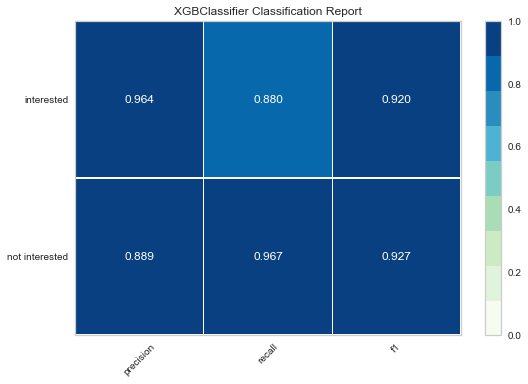

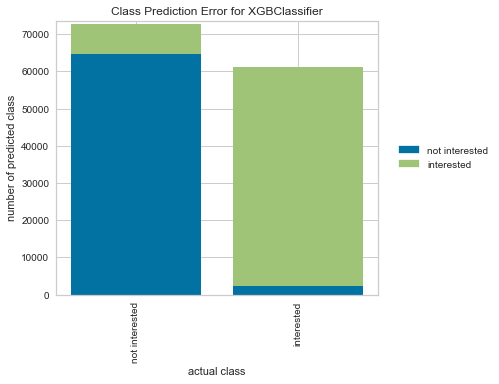

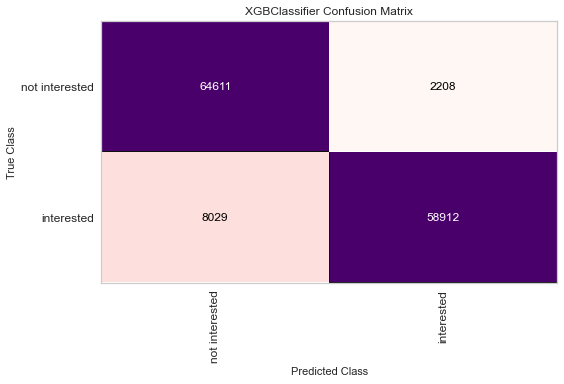

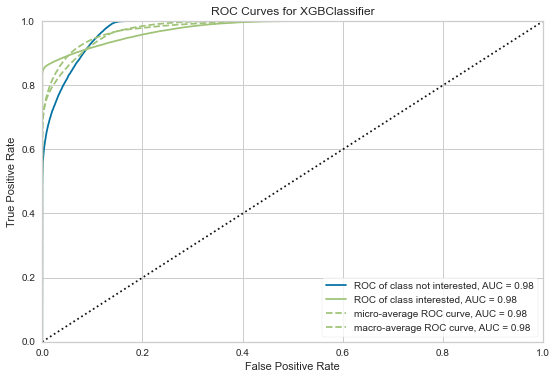

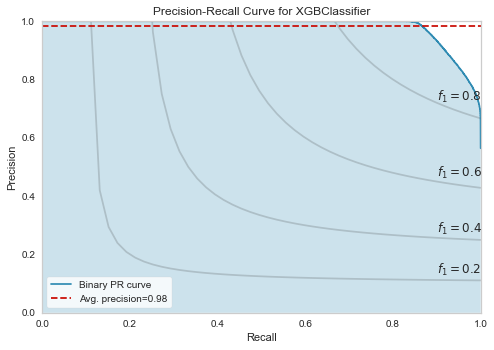

In [130]:
get_evaluations(xgb_clf)

In [131]:
results_df_2 = pd.DataFrame(data=[["XGBoost", xgb_train_acc, xgb_test_acc, xgb_auc, xgb_precision, xgb_recall]], 
                          columns=columns)
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy,Testing Accuracy,AUC Score,Precision,Recall
0,Logistic Regression,0.788226,0.787769,0.812672,0.717895,0.948746
1,Decision Tree,0.886707,0.847324,0.898434,0.801754,0.923201
2,Random Forest,0.916752,0.876420,0.960359,0.822796,0.959771
3,XGBoost,0.941615,0.923467,0.978919,0.963874,0.880059


## 5. Light GBM

In [132]:
import lightgbm as lgb

light_gbm = lgb.LGBMClassifier(random_state=123)
light_gbm.fit(X_train, y_train)

accuracy_train_lightgbm, accuracy_test_lightgbm = model_evaluate(light_gbm)

print('Accuracy on Train Data : {:.3f}'.format(accuracy_train_lightgbm)) 
print('Accuracy on Test Data  : {:.3f}'.format(accuracy_test_lightgbm))

Accuracy on Train Data : 0.885
Accuracy on Test Data  : 0.884


### Light GBM Hyperparameter Tuning

In [133]:
parameters = {"n_estimators": [500, 600, 700],
              "max_depth": [-1],
              "num_leaves": [200, 250],
              "min_child_samples":[70, 75]
             }

grid_cv = GridSearchCV(estimator=light_gbm, param_grid = parameters, cv = 3)
grid_cv.fit(X_train, y_train)

results = grid_cv.cv_results_
param_names = ['param_n_estimators', 'param_num_leaves','param_min_child_samples','mean_test_score']

get_results(param_names, results)

,param_n_estimators,param_num_leaves,param_min_child_samples,mean_test_score
5,700,250,70,0.908012
11,700,250,75,0.907894
4,700,200,70,0.907747
3,600,250,70,0.907612
10,700,200,75,0.907580
1,500,250,70,0.907567
9,600,250,75,0.907550
8,600,200,75,0.907405
7,500,250,75,0.907293
2,600,200,70,0.907248


In [134]:
best_params = grid_cv.best_params_
print('Best parameters: ', best_params)

lgbm_clf = lgb.LGBMClassifier(**best_params, random_state=123)
lgbm_clf.fit(X_train, y_train)

test_prediction_proba = lgbm_clf.predict_proba(X_test)[:,1]
lgbm_auc = roc_auc_score(y_test, test_prediction_proba)

y_pred_lgbm = lgbm_clf.predict(X_test)
lgbm_precision = precision_score(y_test, y_pred_lgbm)
lgbm_recall = recall_score(y_test, y_pred_lgbm)

lgbm_train_acc, lgbm_test_acc = print_score(lgbm_clf)

Best parameters:  {'max_depth': -1, 'min_child_samples': 70, 'n_estimators': 700, 'num_leaves': 250}
Train Accuracy: 95.66%
Test Accuracy: 91.16%


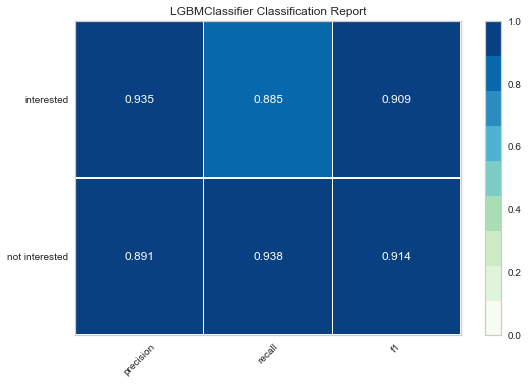

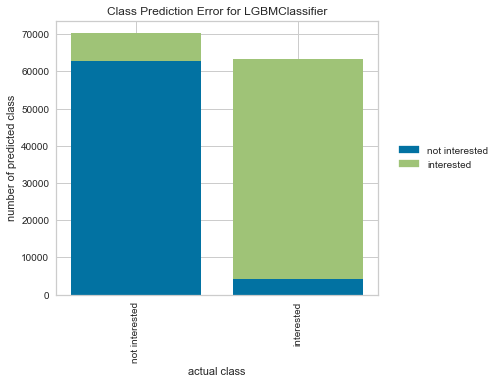

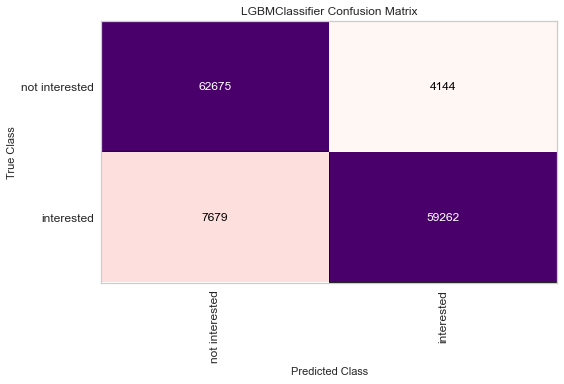

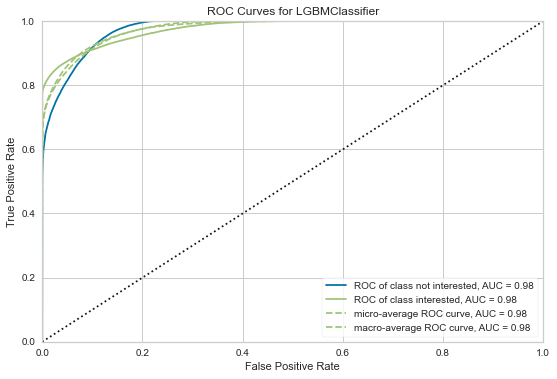

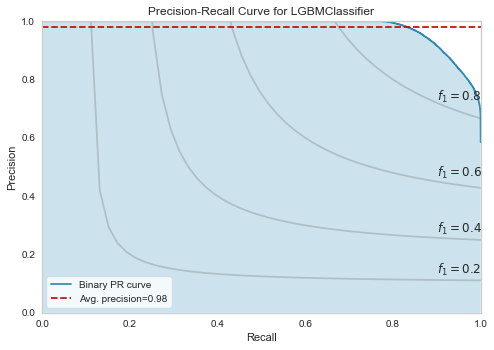

In [135]:
get_evaluations(lgbm_clf)

In [136]:
results_df_2 = pd.DataFrame(data=[["Light GBM", lgbm_train_acc, lgbm_test_acc, lgbm_auc, lgbm_precision, lgbm_recall]], 
                          columns=columns)
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)

In [137]:
tuning_results_df

,Model,Training Accuracy,Testing Accuracy,AUC Score,Precision,Recall
0,Logistic Regression,0.788226,0.787769,0.812672,0.717895,0.948746
1,Decision Tree,0.886707,0.847324,0.898434,0.801754,0.923201
2,Random Forest,0.916752,0.876420,0.960359,0.822796,0.959771
3,XGBoost,0.941615,0.923467,0.978919,0.963874,0.880059
4,Light GBM,0.956609,0.911610,0.976541,0.934643,0.885287


## 6. Artifical Neural Network

In [138]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

input_number = X_train.shape[1] 

In [139]:
model_ann = Sequential()
model_ann.add(Dense(128, activation='relu', input_shape = (input_number,), name = "Hidden_Layer_1"))
model_ann.add(BatchNormalization())
model_ann.add(Dense(128, activation='relu', name = "Hidden_Layer_2"))
model_ann.add(Dense(64, activation='relu', name = "Hidden_Layer_3"))
model_ann.add(Dense(32, activation='relu', name = "Hidden_Layer_4"))
model_ann.add(Dense(1, activation='sigmoid', name = "Output"))

In [140]:
model_ann.compile(optimizer ='adam', loss='binary_crossentropy', metrics =['accuracy', 'AUC', 'Precision', 'Recall'])

In [141]:
model_ann.fit(X_train, y_train, epochs=100, batch_size=200, verbose=0)

In [142]:
train_result = model_ann.evaluate(X_train, y_train, verbose = 0)
ann_train_acc = train_result[1]
ann_train_auc = train_result[2]
ann_train_precision = train_result[3]
ann_train_recall = train_result[4]
ann_test_acc = model_ann.evaluate(X_test, y_test, verbose = 0)[1]

In [143]:
results_df_2 = pd.DataFrame(data=[["Artificial Neural Network", ann_train_acc, ann_test_acc, ann_train_auc, ann_train_precision, ann_train_recall]], 
                          columns=columns)
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)

# Results 

In [144]:
tuning_results_df

,Model,Training Accuracy,Testing Accuracy,AUC Score,Precision,Recall
0,Logistic Regression,0.788226,0.787769,0.812672,0.717895,0.948746
1,Decision Tree,0.886707,0.847324,0.898434,0.801754,0.923201
2,Random Forest,0.916752,0.876420,0.960359,0.822796,0.959771
3,XGBoost,0.941615,0.923467,0.978919,0.963874,0.880059
4,Light GBM,0.956609,0.911610,0.976541,0.934643,0.885287
5,Artificial Neural Network,0.831924,0.819999,0.889098,0.767631,0.951929


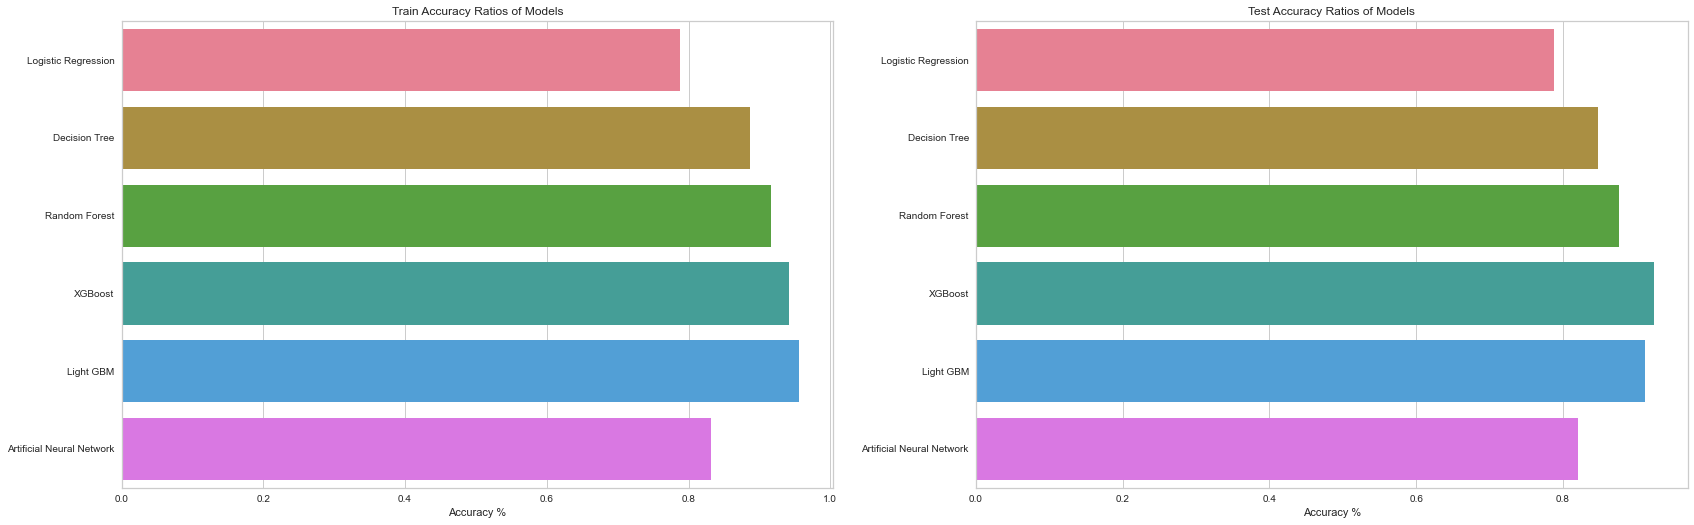

In [145]:
plt.figure(figsize=(25, 8))
plt.subplot(121)
sns.barplot(x = 'Training Accuracy', y = 'Model', data=tuning_results_df, palette='husl')
plt.xlabel('Accuracy %')
plt.ylabel('')
plt.title('Train Accuracy Ratios of Models')
plt.subplot(122)
sns.barplot(x = 'Testing Accuracy', y = 'Model', data=tuning_results_df, palette='husl')
plt.xlabel('Accuracy %')
plt.ylabel('')
plt.title('Test Accuracy Ratios of Models')
plt.show()

From the above analysis it is quite evidient that with test accuracy of about 92% XGBoost works better than other algorithms. Therefore, we will use XGBoost algorithm for prediction.

# Prediction

In [146]:
test_prep.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,1_year_below,2_years_above
0,0,0.076923,1,0.211538,1,1,0.070633,0.932099,0.148789,1,0
1,0,0.307692,1,0.538462,0,0,0.066321,0.037037,0.349481,0,0
2,0,0.415385,1,0.538462,0,0,0.079717,0.759259,0.653979,0,0
3,0,0.061538,1,0.519231,1,0,0.073978,0.932099,0.612457,1,0
4,0,0.107692,1,0.538462,1,1,0.120293,0.932099,0.993080,1,0


In [147]:
preds = xgb_clf.predict(test_prep)
submission = pd.concat([pd.Series(test_ids), pd.Series(preds)], ignore_index=True, axis=1)
submission.columns = ['id', 'Response']

In [148]:
submission

,id,Response
0,381110,0
1,381111,1
2,381112,1
3,381113,1
4,381114,1
...,...,...
127032,508142,1
127033,508143,1
127034,508144,0
127035,508145,0


In [149]:
submission.to_csv("submission.csv", index=False)